# Architecture and Models

## Neuron Model

In [3]:
"""
Daniel Maidment

Thu Oct 15 2019
"""
########################################################################
import spyder_utilities as su
import numpy as np
import matplotlib.pyplot as plt
from spnetwork.neuron import Neuron
########################################################################
np.random.seed(100)

c:\users\purco\documents\python_ws\python-virtual-environments\masters_env\lib\site-packages\numpy\lib\function_base.py:1067: RuntimeWarning: divide by zero encountered in true_divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
c:\users\purco\documents\python_ws\python-virtual-environments\masters_env\lib\site-packages\numpy\lib\function_base.py:1068: RuntimeWarning: divide by zero encountered in true_divide
  b = (dx2 - dx1) / (dx1 * dx2)
c:\users\purco\documents\python_ws\python-virtual-environments\masters_env\lib\site-packages\numpy\lib\function_base.py:1069: RuntimeWarning: divide by zero encountered in true_divide
  c = dx1 / (dx2 * (dx1 + dx2))
c:\users\purco\documents\python_ws\python-virtual-environments\masters_env\lib\site-packages\numpy\lib\function_base.py:1075: RuntimeWarning: invalid value encountered in add
  out[tuple(slice1)] = a * f[tuple(slice2)] + b * f[tuple(slice3)] + c * f[tuple(slice4)]
c:\users\purco\documents\python_ws\python-virtual-environments\masters_env\lib\site-pa

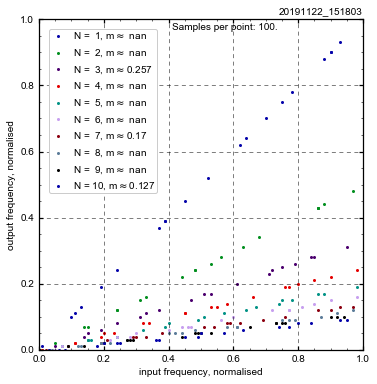

In [4]:
np.random.seed(100)
size = 100
N = 11

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax = su.config_axis(ax, x_lim=(0, 1), y_lim=(0, 1), Eng=False)
P = np.arange(0.01, 1, 0.05)

for n in np.arange(1, N, 1):
    tNeuron = Neuron(n)
    p_x = np.empty(np.shape(P), dtype=float)
    p_y = np.empty(np.shape(P), dtype=float)

    for i in range(len(P)):
        in_ar_1 = np.array(np.random.binomial(1, P[i], size), dtype=bool)
        p_x[i] = np.mean(in_ar_1)

        out_ar = np.zeros(size, bool)

        for j in range(size):
            out_ar[j] = tNeuron + in_ar_1[j]

        p_y[i] = np.mean(out_ar)
        tNeuron.reset()

    slope = np.mean(np.gradient(p_y, p_x))
    label = f"N = {n:2d}, m"
    label += r"$\approx$" + "{:4.3}".format(slope)
    ax.scatter(p_x, p_y, label=label)

s = f"Samples per point: {size}."
plt.legend()
ax.text(0.41, 0.99, s,
        horizontalalignment='left',
        verticalalignment='top',
        transform=ax.transAxes)
ax.set_xlabel("input frequency, normalised")
ax.set_ylabel("output frequency, normalised")
plt.show()

In [2]:
su.save_fig(fig=fig, path = "\\images\\neuron",
            image_nm=f"neuron_frequency_model_{n}_{size}",
            paper_format=['pdf'])

NameError: name 'fig' is not defined

In [5]:
"""
Daniel Maidment

Thu Oct 21 2019
"""
########################################################################
import spyder_utilities as su
import numpy as np
import matplotlib.pyplot as plt
from spnetwork import neuron
########################################################################
np.random.seed(100)

In [71]:
"""
Daniel Maidment

Thu Oct 21 2019
"""
########################################################################
import spyder_utilities as su
import numpy as np
import matplotlib.pyplot as plt
from spnetwork import neuron
########################################################################
np.random.seed(100)
nN = 2
tn = neuron.Neuron(nN)
tnf = neuron.XORFBNeuron(nN)
N = 100
p = 0.5
nS = 4
t = np.arange(0, N, 1)
s = np.random.binomial(1, p, (N, nS))
tnout = np.zeros((nN, N), dtype=int)
for i in range(N):
    tn+s[i]
    tnf + s[i]
    tnout[0, i] = int(tn.state)
    tnout[1, i] = int(tnf.state)

fig0, axarr = plt.subplots(nS+2, 1, figsize=(12, 1.5*(nS+nN)),
                           sharex=True, sharey=True)
for i in range(nS):
    axarr[i] = su.binary_ax_config(N=N, ax=axarr[i])
    axarr[i].step(t, s[:, i], where='post', linewidth=2,
                  label="mean={:.3}".format(np.mean(s[:, i])))
    axarr[i].legend(loc="upper left", bbox_to_anchor=(1,1))
    axarr[i].set_title(f"Input {i}")

axarr[-2] = su.binary_ax_config(N=N, ax=axarr[-2])
axarr[-2].step(t, tnout[0], where='post', linewidth=2,
               label="mean={:.3}".format(np.mean(tnout[0])))
axarr[-2].legend(loc="upper left", bbox_to_anchor=(1,1))
axarr[-2].set_title("Neuron Output")

axarr[-1] = su.binary_ax_config(N=N, ax=axarr[-1])
axarr[-1].step(t, tnout[1], where='post', linewidth=2,
               label="mean={:.3}".format(np.mean(tnout[1])))
axarr[-1].legend(loc="upper left", bbox_to_anchor=(1,1))
axarr[-1].set_title("Neuron with feedback Output")
axarr[-1].set_xlabel("Number of clock cycles")
plt.show()

In [61]:
su.save_fig(fig=fig0, path = "\\images\\neuron",
            image_nm=f"neuron_timeseries_model_{nN}N{nS}S",
            paper_format=['pdf'])

### Time series data of neuron with feedback register with random input

In [5]:
import spyder_utilities as su
import matplotlib.pyplot as plt
import numpy as np
from spnetwork.neuron import Neuron
from spnetwork.neuron import DelayFBNeuron

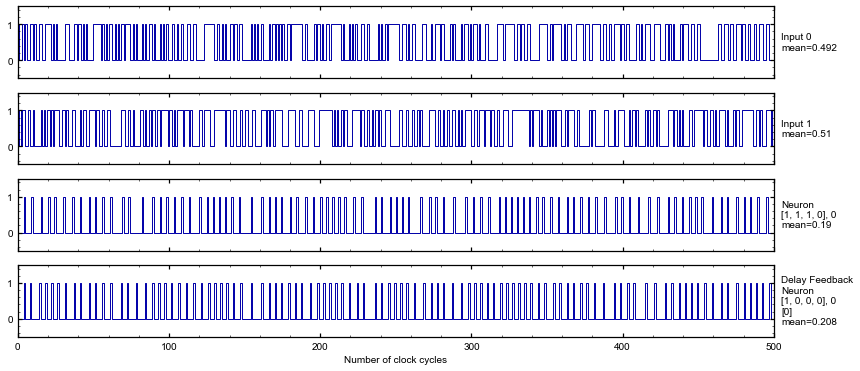

In [38]:
np.random.seed(100)
nn = 4
tnls = [Neuron(nn),
        DelayFBNeuron(nn, 1)]
nN = len(tnls)
N = 500
p = 0.5
nS = 2
t = np.arange(0, N, 1)
s = np.random.binomial(1, p, (N, nS))
tnout = np.zeros((nN, N), dtype=int)
for i in range(N):
    for k in range(len(tnls)):
        tnls[k]+s[i]
        tnout[k, i] = int(tnls[k].state)

fig0, axarr = plt.subplots(nS+nN, 1, figsize=(14, 1.5*(nS+nN)),
                           sharex=True, sharey=True)
for i in range(nS):
    lbl = "Input {}\nmean={:.3}".format(i, np.mean(s[:, i]))
    axarr[i] = su.binary_ax_config(N=N, ax=axarr[i])
    axarr[i].step(t, s[:, i], where='post', linewidth=1)
    axarr[i].text(1.01, 0.5, s=lbl,
                  horizontalalignment='left',
                  verticalalignment='center',
                  transform=axarr[i].transAxes)

for j in range(nS, nN+nS):
    lbl = tnls[j-nS].__repr__()
    lbl += "\nmean={:.3}".format(np.mean(tnout[j-nS]))
    axarr[j] = su.binary_ax_config(N=N, ax=axarr[j])
    axarr[j].step(t, tnout[j-nS], where='post', linewidth=1,
                  label=lbl)
    axarr[j].text(1.01, 0.5, s=lbl,
                  horizontalalignment='left',
                  verticalalignment='center',
                  transform=axarr[j].transAxes)

axarr[-1].set_xlabel("Number of clock cycles")
plt.show()

su.save_fig(fig=fig0, path = "\\images\\neuron\\delayFB",
            image_nm=f"timeseries_model",
            paper_format = ["pdf"])

### Time series data of neuron with feedback register with period input

In [8]:
import spyder_utilities as su
import matplotlib.pyplot as plt
import numpy as np
from spnetwork.neuron import Neuron
from spnetwork.neuron import DelayFBNeuron2

In [9]:
np.random.seed(100)
N = 100
t = np.arange(0, N, 1)
s = np.random.binomial(1, 0.05, (2,N))

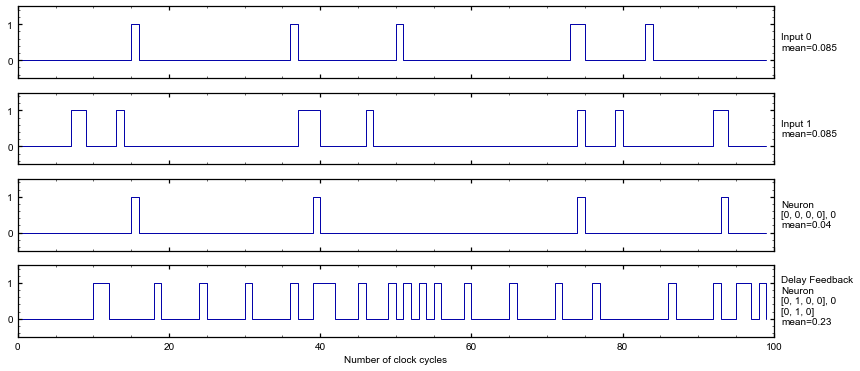

In [10]:
nn = 4
tnls = [Neuron(nn),
        DelayFBNeuron2(nn, 3)]
nN = len(tnls)
p = 0.5
nS = 2
t = np.arange(0, N, 1)
tnout = np.zeros((nN, N), dtype=int)
for i in range(N):
    for k in range(len(tnls)):
        tnls[k]+s[:, i]
        tnout[k, i] = int(tnls[k].state)

fig0, axarr = plt.subplots(nS+nN, 1, figsize=(14, 1.5*(nS+nN)),
                           sharex=True, sharey=True)
for i in range(nS):
    lbl = "Input {}\nmean={:.3}".format(i, np.mean(s))
    axarr[i] = su.binary_ax_config(N=N, ax=axarr[i])
    axarr[i].step(t, s[i], where='post', linewidth=1)
    axarr[i].text(1.01, 0.5, s=lbl,
                  horizontalalignment='left',
                  verticalalignment='center',
                  transform=axarr[i].transAxes)

for j in range(nS, nN+nS):
    lbl = tnls[j-nS].__repr__()
    lbl += "\nmean={:.3}".format(np.mean(tnout[j-nS]))
    axarr[j] = su.binary_ax_config(N=N, ax=axarr[j])
    axarr[j].step(t, tnout[j-nS], where='post', linewidth=1,
                  label=lbl)
    axarr[j].text(1.01, 0.5, s=lbl,
                  horizontalalignment='left',
                  verticalalignment='center',
                  transform=axarr[j].transAxes)

axarr[-1].set_xlabel("Number of clock cycles")
plt.show()

su.save_fig(fig=fig0, path = "\\images\\neuron\\delayFB2",
            image_nm=f"timeseries_model", eps=True)

### Feedback Neuron model

#### Where N is small the the feedback register length is N-1

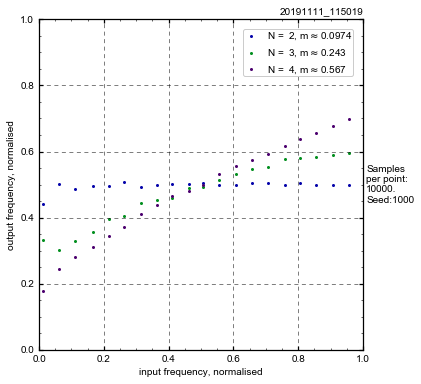

In [7]:
"""
Daniel Maidment

Thu Oct 24 11:27:55 2019
"""
########################################################################

import spyder_utilities as su
import numpy as np
import matplotlib.pyplot as plt
from spnetwork.neuron import DelayFBNeuron2

########################################################################

seed = 1000
size = 10000
N = 5

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax = su.config_axis(ax, x_lim=(0, 1), y_lim=(0, 1), Eng=False)
P = np.arange(0.01, 1, 0.05)

for n in np.arange(2, N, 1):
    tNeuron = DelayFBNeuron2(n, n-1)

    p_x = np.empty(np.shape(P), dtype=float)
    p_y = np.empty(np.shape(P), dtype=float)

    for i in range(len(P)):
        np.random.seed(seed)
        in_ar = np.array(np.random.binomial(1, P[i], size), dtype=bool)
        p_x[i] = np.mean(in_ar)

        out_ar = np.zeros(size, bool)

        for j in range(size):
            out_ar[j] = tNeuron + in_ar[j]

        p_y[i] = np.mean(out_ar)
        tNeuron.reset()

    slope = np.mean(np.gradient(p_y, p_x))
    label = f"N = {n:2d}, m"
    label += r"$\approx$" + "{:4.3}".format(slope)
    ax.scatter(p_x, p_y, label=label)

s = f"Samples\nper point:\n{size}.\nSeed:{seed}"
ax.legend()
ax.text(1.01, 0.5, s,
        horizontalalignment='left',
        verticalalignment='center',
        transform=ax.transAxes)
ax.set_xlabel("input frequency, normalised")
ax.set_ylabel("output frequency, normalised")
plt.show()

In [8]:
su.save_fig(fig=fig, path = "\\images\\neuron\\delayFB2",
            image_nm=f"frequency_model_small_values of N",
            paper_format=['pdf'], debug=True)

path specified as: \images\neuron\delayFB2


#### A Single small value of N and $n\in[1, N)$

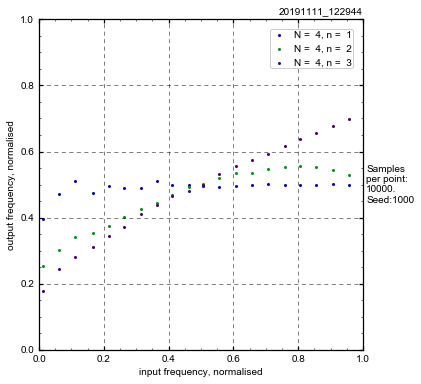

In [27]:
"""
Daniel Maidment

Thu Nov 11
"""
########################################################################

import spyder_utilities as su
import numpy as np
import matplotlib.pyplot as plt
from spnetwork.neuron import DelayFBNeuron2

########################################################################

seed = 1000
size = 10000
N = 4

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax = su.config_axis(ax, x_lim=(0, 1), y_lim=(0, 1), Eng=False)
P = np.arange(0.01, 1, 0.05)

for n in np.arange(1, N, 1):
    tNeuron = DelayFBNeuron2(N, n)

    p_x = np.empty(np.shape(P), dtype=float)
    p_y = np.empty(np.shape(P), dtype=float)

    for i in range(len(P)):
        np.random.seed(seed)
        in_ar = np.array(np.random.binomial(1, P[i], size), dtype=bool)
        p_x[i] = np.mean(in_ar)

        out_ar = np.zeros(size, bool)

        for j in range(size):
            out_ar[j] = tNeuron + in_ar[j]

        p_y[i] = np.mean(out_ar)
        tNeuron.reset()

    slope = np.mean(np.gradient(p_y, p_x))
    label = f"N = {N:2d}, "
    label += f"n = {n:2d}"
    ax.scatter(p_x, p_y, label=label)

s = f"Samples\nper point:\n{size}.\nSeed:{seed}"
ax.legend()
ax.text(1.01, 0.5, s,
        horizontalalignment='left',
        verticalalignment='center',
        transform=ax.transAxes)
ax.set_xlabel("input frequency, normalised")
ax.set_ylabel("output frequency, normalised")
plt.show()

In [60]:
su.save_fig(fig=fig, path = "\\images\\neuron\\delayFB2",
            image_nm=f"frequency_model_N{N:2d}",
            paper_format=['pdf'], debug=True)

path specified as: \images\neuron\delayFB2


#### Small values of N and n = 2

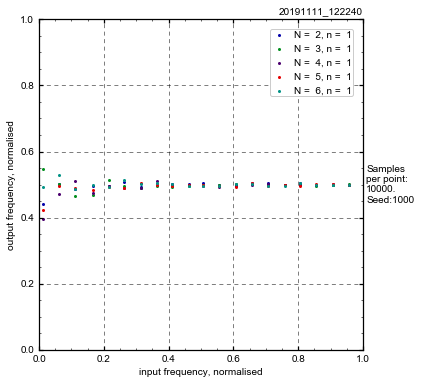

In [25]:
"""
Daniel Maidment

Thu Nov 11
"""
########################################################################

import spyder_utilities as su
import numpy as np
import matplotlib.pyplot as plt
from spnetwork.neuron import DelayFBNeuron2

########################################################################

seed = 1000
size = 10000
N = 7

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax = su.config_axis(ax, x_lim=(0, 1), y_lim=(0, 1), Eng=False)
P = np.arange(0.01, 1, 0.05)

for n in np.arange(2, N, 1):
    tNeuron = DelayFBNeuron2(n, 1)

    p_x = np.empty(np.shape(P), dtype=float)
    p_y = np.empty(np.shape(P), dtype=float)

    for i in range(len(P)):
        np.random.seed(seed)
        in_ar = np.array(np.random.binomial(1, P[i], size), dtype=bool)
        p_x[i] = np.mean(in_ar)

        out_ar = np.zeros(size, bool)

        for j in range(size):
            out_ar[j] = tNeuron + in_ar[j]

        p_y[i] = np.mean(out_ar)
        tNeuron.reset()

    slope = np.mean(np.gradient(p_y, p_x))
    label = f"N = {n:2d}, "
    label += f"n = {1:2d}"
    ax.scatter(p_x, p_y, label=label)

s = f"Samples\nper point:\n{size}.\nSeed:{seed}"
ax.legend()
ax.text(1.01, 0.5, s,
        horizontalalignment='left',
        verticalalignment='center',
        transform=ax.transAxes)
ax.set_xlabel("input frequency, normalised")
ax.set_ylabel("output frequency, normalised")
plt.show()

In [26]:
su.save_fig(fig=fig, path = "\\images\\neuron\\delayFB2",
            image_nm=f"frequency_model_smallN_n{1:2d}",
            paper_format=['pdf'], debug=True)

path specified as: \images\neuron\delayFB2


#### Polynomial Curve Fitting of DelayFBNeuron2

In [36]:
"""
Daniel Maidment

Thu Nov 11
"""
########################################################################

import spyder_utilities as su
import numpy as np
import matplotlib.pyplot as plt
from spnetwork.neuron import DelayFBNeuron2

########################################################################

seed = 1000
size = 10000
N = 4

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax = su.config_axis(ax, x_lim=(0, 1), y_lim=(0, 1), Eng=False)
P = np.arange(0.01, 1, 0.01)

tNeuron = DelayFBNeuron2(4, 2)

p_x = np.empty(np.shape(P), dtype=float)
p_y = np.empty(np.shape(P), dtype=float)

for i in range(len(P)):
    np.random.seed(seed)
    in_ar = np.array(np.random.binomial(1, P[i], size), dtype=bool)
    p_x[i] = np.mean(in_ar)

    out_ar = np.zeros(size, bool)

    for j in range(size):
        out_ar[j] = tNeuron + in_ar[j]

    p_y[i] = np.mean(out_ar)
    tNeuron.reset()

slope = np.mean(np.gradient(p_y, p_x))
label = f"N = {4:2d}, "
label += f"n = {2:2d}"

ax.plot(p_x, p_y, label=label)

s = f"Samples\nper point:\n{size}.\nSeed:{seed}"
ax.legend()
ax.text(1.01, 0.5, s,
        horizontalalignment='left',
        verticalalignment='center',
        transform=ax.transAxes)
ax.set_xlabel("input frequency, normalised")
ax.set_ylabel("output frequency, normalised")
plt.show()

In [39]:
file = open("neuron_model_data/xor_fb_N4_n2_10000.txt", 'w')
for i in range(len(p_x)):
    file.write(f"{p_x[i]}, {p_y[i]}\n")
file.close()

In [63]:
degree = 11
vec = np.polyfit(p_x, p_y, degree)
y_fit = np.zeros(len(p_x), dtype=float)
for deg in np.arange(degree, -1, -1):
    y_fit += vec[degree-deg]*p_x**deg

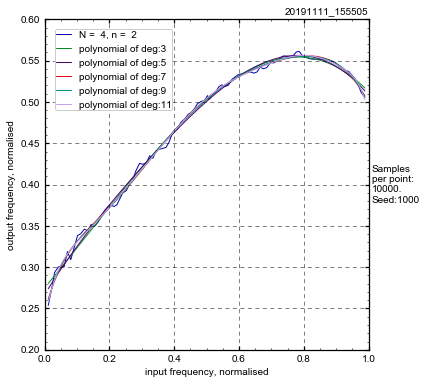

In [70]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax = su.config_axis(ax, x_lim=(0, 1), y_lim=(0.2, 0.6), Eng=False)

label = f"N = {4:2d}, "
label += f"n = {2:2d}"

ax.plot(p_x, p_y, label=label)
degrees = 12
for degree in range(3, degrees,2):
    vec = np.polyfit(p_x, p_y, degree)
    y_fit = np.zeros(len(p_x), dtype=float)
    for deg in np.arange(degree, -1, -1):
        y_fit += vec[degree-deg]*p_x**deg
    ax.plot(p_x, y_fit, label=f"polynomial of deg:{degree}")

s = f"Samples\nper point:\n{size}.\nSeed:{seed}"
ax.legend()
ax.text(1.01, 0.5, s,
        horizontalalignment='left',
        verticalalignment='center',
        transform=ax.transAxes)
ax.set_xlabel("input frequency, normalised")
ax.set_ylabel("output frequency, normalised")
plt.show()

In [71]:
su.save_fig(fig=fig, path = "\\images\\neuron\\delayFB2",
            image_nm=f"polyfit_orders_{degrees}_N{4}_n{2}",
            paper_format=['pdf'], debug=True)

path specified as: \images\neuron\delayFB2


## Synapse Model

In [1]:
"""
Daniel Maidment

Thu Oct 15 2019
"""
########################################################################
import spyder_utilities as su
import numpy as np
import matplotlib.pyplot as plt
from spnetwork import synapse
########################################################################
np.random.seed(100)

### Changing the synaptic seed frequency [$p_{seed}$] and input frequency for a fixed synaptic length [N]

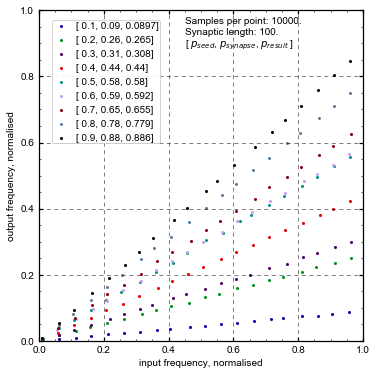

In [2]:
size = 10000
N = 100

fig2, ax = plt.subplots(1, 1, figsize=(6, 6))
ax = su.config_axis(ax, x_lim=(0, 1), y_lim=(0, 1), Eng=False)
P = np.arange(0.01, 1, 0.05)

for p in np.arange(0.1, 1, 0.1):
    testSynapse = synapse.Synapse(N=N, p=p)
    p_x = np.empty(np.shape(P), dtype=float)
    p_y = np.empty(np.shape(P), dtype=float)

    for i in range(len(P)):
        in_ar = np.array(np.random.binomial(1, P[i], size), dtype=bool)
        out_ar = np.zeros(size, bool)

        for j in range(size):
            out_ar[j] = testSynapse*in_ar[j]

        p_x[i] = np.mean(in_ar)
        p_y[i] = np.mean(out_ar)

    slope = np.mean(np.gradient(p_y, p_x))
    label = "[{:4.3}, {:4.3}, {:4.3}]".format(p, testSynapse.getMean(), slope)
    ax.scatter(p_x, p_y, label=label)

s = f"Samples per point: {size}."
s += f"\nSynaptic length: {N}.\n"
s += r"[ $p_{seed}$, $p_{synapse}$, $p_{result}$ ]"
plt.legend(bbox_to_anchor=(0.01, 1), loc = "upper left")
ax.text(0.45, 0.98, s,
        horizontalalignment='left',
        verticalalignment='top',
        transform=ax.transAxes)
ax.set_xlabel("input frequency, normalised")
ax.set_ylabel("output frequency, normalised")
plt.show()

In [3]:
su.save_fig(fig=fig2, path = "\\images\\synapse",
            image_nm=f"synapse_frequency_model_{N}_{size}",
            paper_format=['pdf'])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


### Changing the input frequency and synaptic length [N] for a fixed synaptic frequency [$p_{seed}=0.5$].

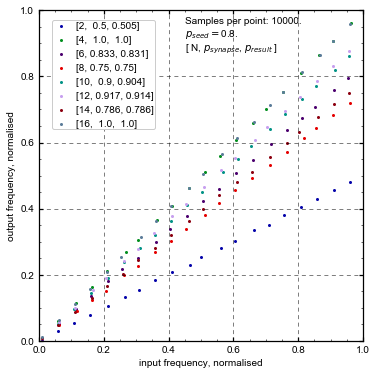

In [32]:
size = 10000
N = 17
p=0.8

fig2, ax = plt.subplots(1, 1, figsize=(6, 6))
ax = su.config_axis(ax, x_lim=(0, 1), y_lim=(0, 1), Eng=False)
P = np.arange(0.01, 1, 0.05)
for n in np.arange(2, N, 2):
    testSynapse = synapse.Synapse(N=n, p=p)
    p_x = np.empty(np.shape(P), dtype=float)
    p_y = np.empty(np.shape(P), dtype=float)

    for i in range(len(P)):
        in_ar = np.array(np.random.binomial(1, P[i], size), dtype=bool)
        out_ar = np.zeros(size, bool)

        for j in range(size):
            out_ar[j] = testSynapse*in_ar[j]

        p_x[i] = np.mean(in_ar)
        p_y[i] = np.mean(out_ar)

    slope = np.mean(np.gradient(p_y, p_x))
    label = "[{}, {:4.3}, {:4.3}]".format(n, testSynapse.getMean(), slope)
    ax.scatter(p_x, p_y, label=label)

s = f"Samples per point: {size}.\n"
s += r"$p_{seed}=$"+f"{p}.\n"
s += r"[ N, $p_{synapse}$, $p_{result}$ ]"
plt.legend(bbox_to_anchor=(0.01, 1), loc = "upper left")
ax.text(0.45, 0.98, s,
        horizontalalignment='left',
        verticalalignment='top',
        transform=ax.transAxes)
ax.set_xlabel("input frequency, normalised")
ax.set_ylabel("output frequency, normalised")
plt.show()

In [24]:
su.save_fig(fig=fig2, path = "\\images\\synapse",
            image_nm=f"synapse_length_model_{p}_{size}",
            paper_format=['pdf'])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


## Network Model

### Single synapse to single neuron

![caption](images/1S1N_Interaction.png)\label{fig:1S1N_interaction}
##### A single synapse to a single Neuron

In [1]:
"""
Daniel Maidment

Thu Oct 15 2019
"""
########################################################################
import spyder_utilities as su
import numpy as np
import matplotlib.pyplot as plt
from spnetwork import synapse
from spnetwork import neuron
########################################################################
np.random.seed(100)

In [119]:
# Parameters
nN = 8
nS = 16
sP = 0.9

s0 = synapse.Synapse(nS, p=sP)
n = neuron.Neuron(nN)

In [120]:
s0, n

(Synapse: [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], f = 0.9375, N = 16,
 Neuron	[0, 0, 0, 0, 0, 0, 0, 0], 0)

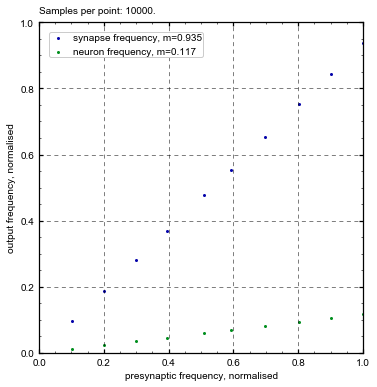

In [117]:
np.random.seed(100)
P = np.arange(0.1, 1.1, 0.1)
N = 10000
xf = np.empty(10, dtype=float)
sf = np.empty(10, dtype=float)
yf = np.empty(10, dtype=float)

fig3, ax = plt.subplots(1, 1, figsize = (6,6))
ax = su.config_axis(ax,
                    x_lim=(0, 1), y_lim=(0, 1),
                    Eng=False,
                    mult_x=0.1, mult_y=0.1)
for j in range(10):
    x0 = np.random.binomial(1,P[j] , N)
    y0 = np.empty(N, dtype=bool)
    sn = np.empty(N, dtype=bool)
    for i in range(N):
        s0*x0[i]  
        sn[i] = s0.state
        n+s0.state
        y0[i] = n.state
    n.reset()
    xf[j] = np.mean(np.array(x0, int))
    sf[j] = np.mean(np.array(sn, int))
    yf[j] = np.mean(np.array(y0, int))
gs = np.mean(np.gradient(sf, xf))
gn = np.mean(np.gradient(yf, xf))
ax.scatter(xf, sf, label="synapse frequency, m={:.3}".format(gs))
ax.scatter(xf, yf, label="neuron frequency, m={:.3}".format(gn))
ax.legend(bbox_to_anchor=(0, 1), loc = "upper left")
s = f"Samples per point: {N}.\n"
ax.text(0.0, 0.99, s,
        horizontalalignment='left',
        verticalalignment='bottom',
        transform=ax.transAxes,
        bbox=dict(facecolor='white',
                  alpha=0,
                  edgecolor='white'))
ax.set_xlabel("presynaptic frequency, normalised")
ax.set_ylabel("output frequency, normalised")
plt.show()

In [118]:
su.save_fig(fig=fig3, path = "\\images\\network",
            image_nm=f"1synapse_1neuron_sP{sP}_nN{nN}_samples{N}",
            paper_format=['pdf'])

### Two synapses to a single neuron

![caption](images/2S1N_Interaction.png)\label{fig:2S1N_interaction}
##### Two synapses to a single neuron

In [1]:
"""
Daniel Maidment

Thu Oct 18 2019
"""
########################################################################
import spyder_utilities as su
import numpy as np
import matplotlib.pyplot as plt
from spnetwork import synapse
from spnetwork import neuron
########################################################################
np.random.seed(100)

In [2]:
# Parameters
nN = 2
nS = 16
sP = 0.1

s0 = synapse.Synapse(nS, p=0.5)
s1 = synapse.Synapse(nS, p=0.5)
n = neuron.Neuron(nN)

In [3]:
s0, s1, n

(Synapse: [1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1], f = 0.4375, N = 16,
 Synapse: [1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1], f = 0.4375, N = 16,
 Neuron	[0, 0, 0, 0], 0)

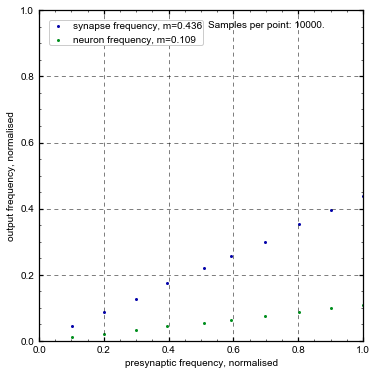

In [30]:
np.random.seed(100)
P = np.arange(0.1, 1.1, 0.1)
N = 10000
xf = np.empty(10, dtype=float)
sf = np.empty(10, dtype=float)
yf = np.empty(10, dtype=float)

fig3, ax = plt.subplots(1, 1, figsize = (6,6))
ax = su.config_axis(ax,
                    x_lim=(0, 1), y_lim=(0, 1),
                    Eng=False,
                    mult_x=0.1, mult_y=0.1)
for j in range(10):
    x0 = np.random.binomial(1,P[j] , N)
    y0 = np.empty(N, dtype=bool)
    sn = np.empty(N, dtype=bool)
    for i in range(N):
        s0*x0[i]  
        sn[i] = s0.state
        n+s0.state
        y0[i] = n.state
    n.reset()
    xf[j] = np.mean(np.array(x0, int))
    sf[j] = np.mean(np.array(sn, int))
    yf[j] = np.mean(np.array(y0, int))
gs = np.mean(np.gradient(sf, xf))
gn = np.mean(np.gradient(yf, xf))
ax.scatter(xf, sf, label="synapse frequency, m={:.3}".format(gs))
ax.scatter(xf, yf, label="neuron frequency, m={:.3}".format(gn))
ax.legend(bbox_to_anchor=(0, 1), loc = "upper left")
s = f"Samples per point: {N}.\n"
ax.text(0.52, 0.97, s,
        horizontalalignment='left',
        verticalalignment='top',
        transform=ax.transAxes)
ax.set_xlabel("presynaptic frequency, normalised")
ax.set_ylabel("output frequency, normalised")
plt.show()

In [33]:
su.save_fig(fig=fig3, path = "\\images\\network",
            image_nm=f"2synapse_1neuron_sP{sP}_nN{nN}_samples{N}",
            paper_format=['pdf'])

### New models with feedback neuron

#### 1 synapse and 1 feedback neuron

##### Architecture

![caption](images/1FBNeuron_1Synapse.png)\label{fig:1FBN1S}

##### Code

In [1]:
"""
Daniel Maidment

Thu Nov 12 2019
"""
########################################################################

import spyder_utilities as su
import numpy as np
import matplotlib.pyplot as plt
from spnetwork.neuron import DelayFBNeuron2
from spnetwork.synapse import Synapse

########################################################################

In [12]:
# Parameters
nN = 4
nFB  = 2
nS = 16
sP = 0.9
seed = 1000

s0 = Synapse(nS, p=sP)
n0 = DelayFBNeuron2(nN, nFB)
s0, n0

(Synapse: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1], f = 0.9375, N = 16,
 Delay Feedback Neuron
 Main:		[0, 0, 0, 0], 0
 Feedback:	[0, 0])

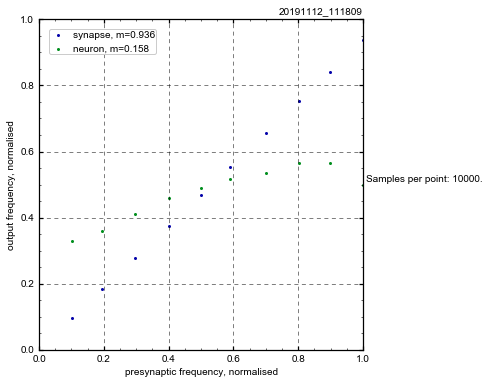

In [13]:
np.random.seed(seed)
P = np.arange(0.1, 1.1, 0.1)
N = 10000
xf = np.empty(10, dtype=float)
sf = np.empty(10, dtype=float)
yf = np.empty(10, dtype=float)

fig, ax = plt.subplots(1, 1, figsize = (6,6))
ax = su.config_axis(ax,
                    x_lim=(0, 1), y_lim=(0, 1),
                    Eng=False,
                    mult_x=0.1, mult_y=0.1)
for j in range(10):
    x0 = np.random.binomial(1,P[j] , N)
    y0 = np.empty(N, dtype=bool)
    sn = np.empty(N, dtype=bool)
    for i in range(N):
        s0*x0[i]  
        sn[i] = s0.state
        n0+s0.state
        y0[i] = n0.state
    n0.reset()
    xf[j] = np.mean(np.array(x0, int))
    sf[j] = np.mean(np.array(sn, int))
    yf[j] = np.mean(np.array(y0, int))
gs = np.mean(np.gradient(sf, xf))
gn = np.gradient(yf, xf))
ax.scatter(xf, sf, label="synapse, m={:.3}".format(gs))
ax.scatter(xf, yf, label="neuron, m={:.3}".format(np.mean(gn))
ax.legend(bbox_to_anchor=(0, 1), loc = "upper left")
s = f"Samples per point: {N}.\n"
ax.text(1.01, 0.5, s,
        horizontalalignment='left',
        verticalalignment='center',
        transform=ax.transAxes)
ax.set_xlabel("presynaptic frequency, normalised")
ax.set_ylabel("output frequency, normalised")
plt.show()